<a href="https://colab.research.google.com/github/fahadrajput99/deep-learning/blob/main/cotton_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE=224
batch_size = 32
channel = 3
epochs=10

In [4]:
from google.colab import drive
import tensorflow as tf

# Mount Google Drive if the dataset is stored there
drive.mount('/content/drive')

# Define parameters
IMAGE_SIZE = 224  # Set your desired image size
BATCH_SIZE = 32   # Set your batch size

# Path to dataset (adjust the path accordingly)
dataset_path = "/content/drive/MyDrive/cotton_data/training"

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

# Check dataset class names
class_names = dataset.class_names
print("Class names:", class_names)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1200 files belonging to 4 classes.
Class names: ['bacterial_blight', 'curl_virus', 'fussarium_wilt', 'healthy']


In [5]:
class_name=dataset.class_names
class_name

['bacterial_blight', 'curl_virus', 'fussarium_wilt', 'healthy']

In [6]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.numpy().shape)

(32, 224, 224, 3)


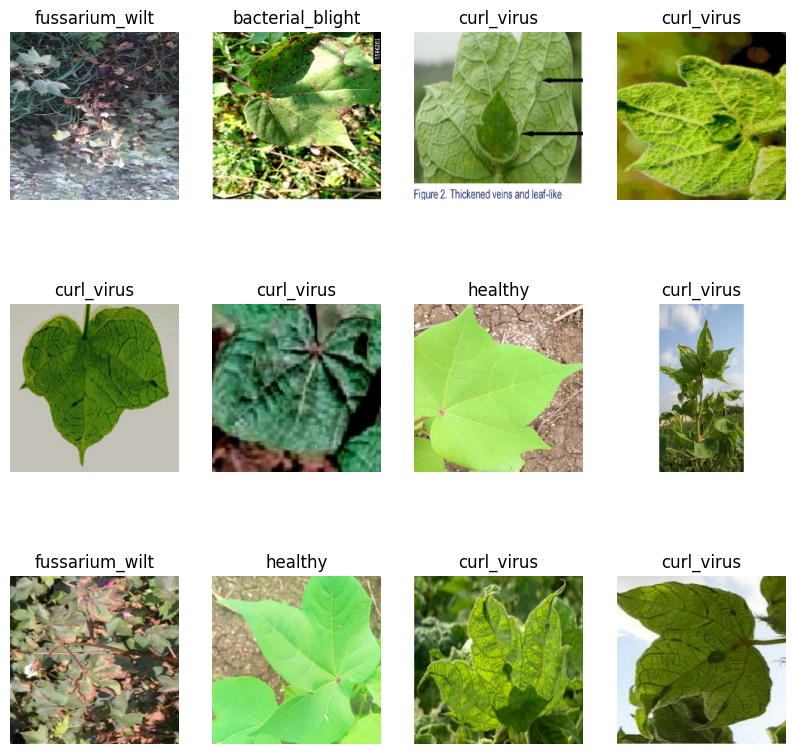

In [7]:
plt.figure(figsize = (10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3 , 4 , i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [ ]:
train_ds = 0.8
len(dataset)*train_ds

24.0

In [ ]:
test_ds=dataset.skip(24)
len(test_ds)

6

In [ ]:
val_size = test_ds.take(6)
len(val_size)

6

In [8]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [9]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [10]:
len(train_ds)

30

In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [12]:
resizing_rescaling = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE , IMAGE_SIZE),
    layers.Rescaling(1.0/255)

])

In [13]:
data_augmentaion = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)

])

In [18]:
N_CLASSES = 4     # Number of classes

# Define input shape for the first layer
input_shape = (IMAGE_SIZE, IMAGE_SIZE, channel)  # Removed batch_size

# Define the model
model = models.Sequential([
    # Resizing and rescaling layer (specify input shape here)
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE, input_shape=input_shape),
    layers.Rescaling(1.0/255),

    # Data augmentation layer
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(N_CLASSES, activation="softmax")
])

# Model summary to check the architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_1 (RandomFlip)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_1 (RandomRotation)   │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,524 (670.02 KB)

 Trainable params: 171,524 (670.02 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(
    optimizer = "adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ["accuracy"])

In [20]:
history = model.fit(
    train_ds,
    epochs=20,
    batch_size = batch_size,
    verbose = 1,
    validation_data = val_ds)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 309s 260ms/step - accuracy: 0.2744 - loss: 1.3746 - val_accuracy: 0.3542 - val_loss: 1.2925
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.4952 - loss: 1.0528 - val_accuracy: 0.5104 - val_loss: 1.0586
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6015 - loss: 0.9517 - val_accuracy: 0.6146 - val_loss: 0.8391
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7027 - loss: 0.7395 - val_accuracy: 0.6354 - val_loss: 0.8378
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7650 - loss: 0.6599 - val_accuracy: 0.7396 - val_loss: 0.6405
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7450 - loss: 0.6828 - val_accuracy: 0.7292 - val_loss: 0.6562
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7596 - loss: 0.6623 - val_accuracy: 0.7708 - val_loss: 0.6009
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8394 - loss: 0.4880 - val_accuracy: 0.7292 

In [32]:
score = model.evaluate(test_ds)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8617 - loss: 0.3876


In [33]:
score

[0.37925177812576294, 0.862500011920929]

In [21]:
import numpy as np
score=model.predict(train_ds)
predicted_labels = np.argmax(score, axis=1)
predicted_labels


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


array([1, 3, 1, 1, 2, 1, 1, 2, 3, 2, 1, 2, 0, 0, 2, 0, 1, 3, 3, 1, 3, 1,
       1, 0, 3, 2, 0, 1, 3, 0, 1, 2, 2, 2, 1, 0, 3, 3, 0, 2, 2, 2, 2, 2,
       1, 1, 3, 3, 3, 1, 0, 2, 3, 1, 0, 2, 1, 2, 1, 2, 0, 2, 3, 1, 0, 1,
       2, 2, 3, 0, 2, 1, 3, 3, 0, 1, 2, 0, 2, 1, 3, 2, 3, 1, 2, 3, 2, 2,
       1, 1, 3, 1, 2, 3, 1, 0, 1, 2, 3, 1, 3, 0, 2, 0, 0, 1, 1, 1, 2, 3,
       0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 3, 1, 0, 2, 1, 1, 2, 1, 2, 2, 0, 2,
       2, 0, 3, 1, 1, 1, 3, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0,
       3, 2, 1, 3, 0, 2, 3, 2, 3, 1, 2, 2, 3, 1, 1, 2, 2, 1, 2, 0, 0, 2,
       2, 2, 3, 2, 2, 2, 0, 3, 0, 1, 3, 0, 1, 3, 3, 1, 0, 2, 2, 1, 3, 3,
       2, 2, 0, 2, 2, 3, 1, 1, 2, 2, 1, 3, 0, 0, 3, 1, 0, 1, 3, 2, 1, 2,
       2, 2, 0, 3, 3, 0, 2, 3, 3, 2, 2, 0, 1, 2, 2, 3, 0, 3, 2, 0, 0, 0,
       1, 0, 1, 3, 2, 1, 2, 3, 2, 2, 1, 2, 1, 0, 0, 1, 2, 3, 2, 0, 1, 3,
       3, 1, 3, 0, 2, 2, 2, 0, 1, 0, 1, 2, 1, 3, 3, 2, 2, 1, 3, 2, 1, 0,
       3, 2, 0, 0, 3, 3, 3, 2, 2, 3, 3, 3, 1, 2, 2,

In [22]:
history

In [23]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 30}

In [24]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [34]:
history.history["accuracy"]

[0.3093220293521881,
 0.5052965879440308,
 0.616525411605835,
 0.7065678238868713,
 0.7383474707603455,
 0.7521186470985413,
 0.7860169410705566,
 0.820974588394165,
 0.8156779408454895,
 0.8283898234367371,
 0.8516949415206909,
 0.8654661178588867,
 0.8686440587043762,
 0.8707627058029175,
 0.8697034120559692,
 0.8707627058029175,
 0.8771186470985413,
 0.9004237055778503,
 0.8983050584793091,
 0.9110169410705566]

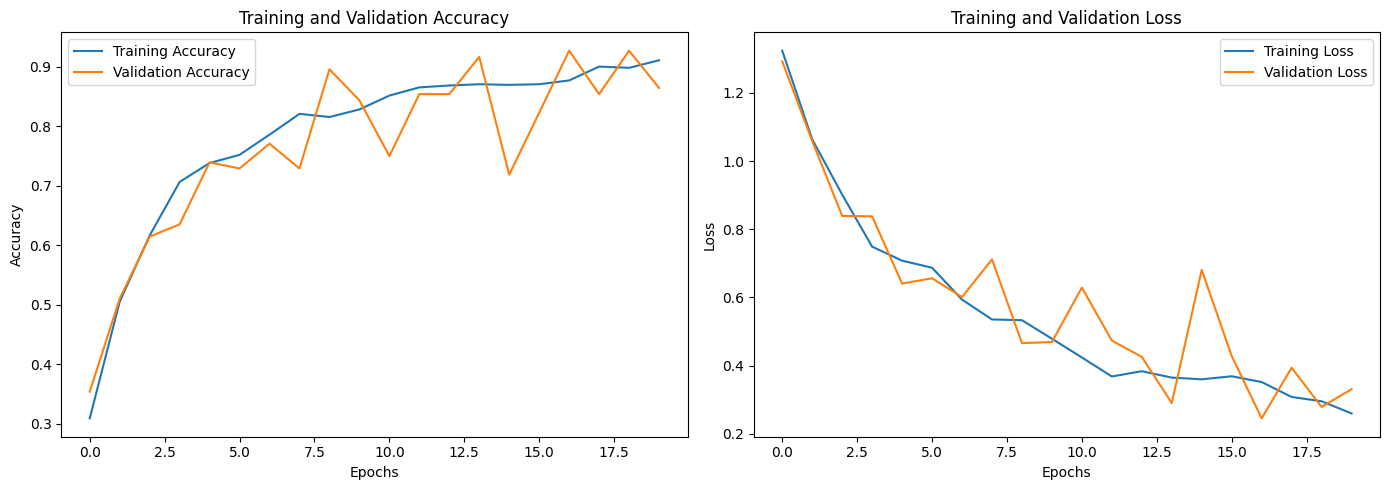

In [26]:
import matplotlib.pyplot as plt

# Extracting metrics from history
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Determining the number of epochs
epochs = range(len(acc))

# Plotting training and validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


first image to predict
actual_label: healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
predicted_label: healthy


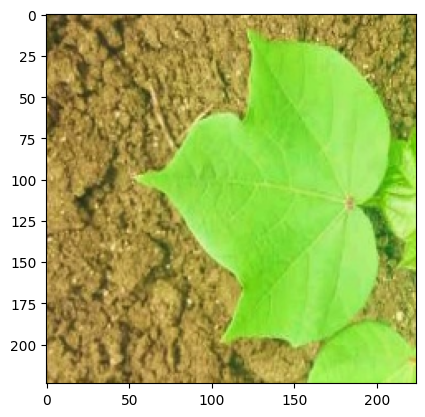

In [55]:
for image_batch , label_batch in test_ds.take(1):
    first_image =(image_batch[0].numpy().astype ("uint8"))
    first_label= label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual_label:" , class_name[first_label])

    batch_prediction=model.predict(image_batch)
    print("predicted_label:" , class_name[np.argmax(batch_prediction[0])])

In [53]:
def predict(model , img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array , 0)

    prediction=model.predict(img_array)

    prediction_class=class_name[np.argmax(batch_prediction[0])]
    confidence=round(100*(np.max(prediction[0])) , 2)
    return prediction_class , confidence


In [59]:
print(f"Label index: {labels[0]}, Actual class: {class_name[labels[0]]}")


Label index: 3, Actual class: healthy


In [58]:
for i in range(5):
    actual_class = class_name[labels[i].numpy()]
    predicted_class, confidence = predict(model, images[i].numpy())
    print(f"Actual: {actual_class}, Predicted: {predicted_class}, Confidence: {confidence:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Actual: healthy, Predicted: healthy, Confidence: 91.77%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Actual: bacterial_blight, Predicted: healthy, Confidence: 54.97%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Actual: bacterial_blight, Predicted: healthy, Confidence: 89.78%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Actual: curl_virus, Predicted: healthy, Confidence: 81.39%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Actual: bacterial_blight, Predicted: healthy, Confidence: 49.17%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


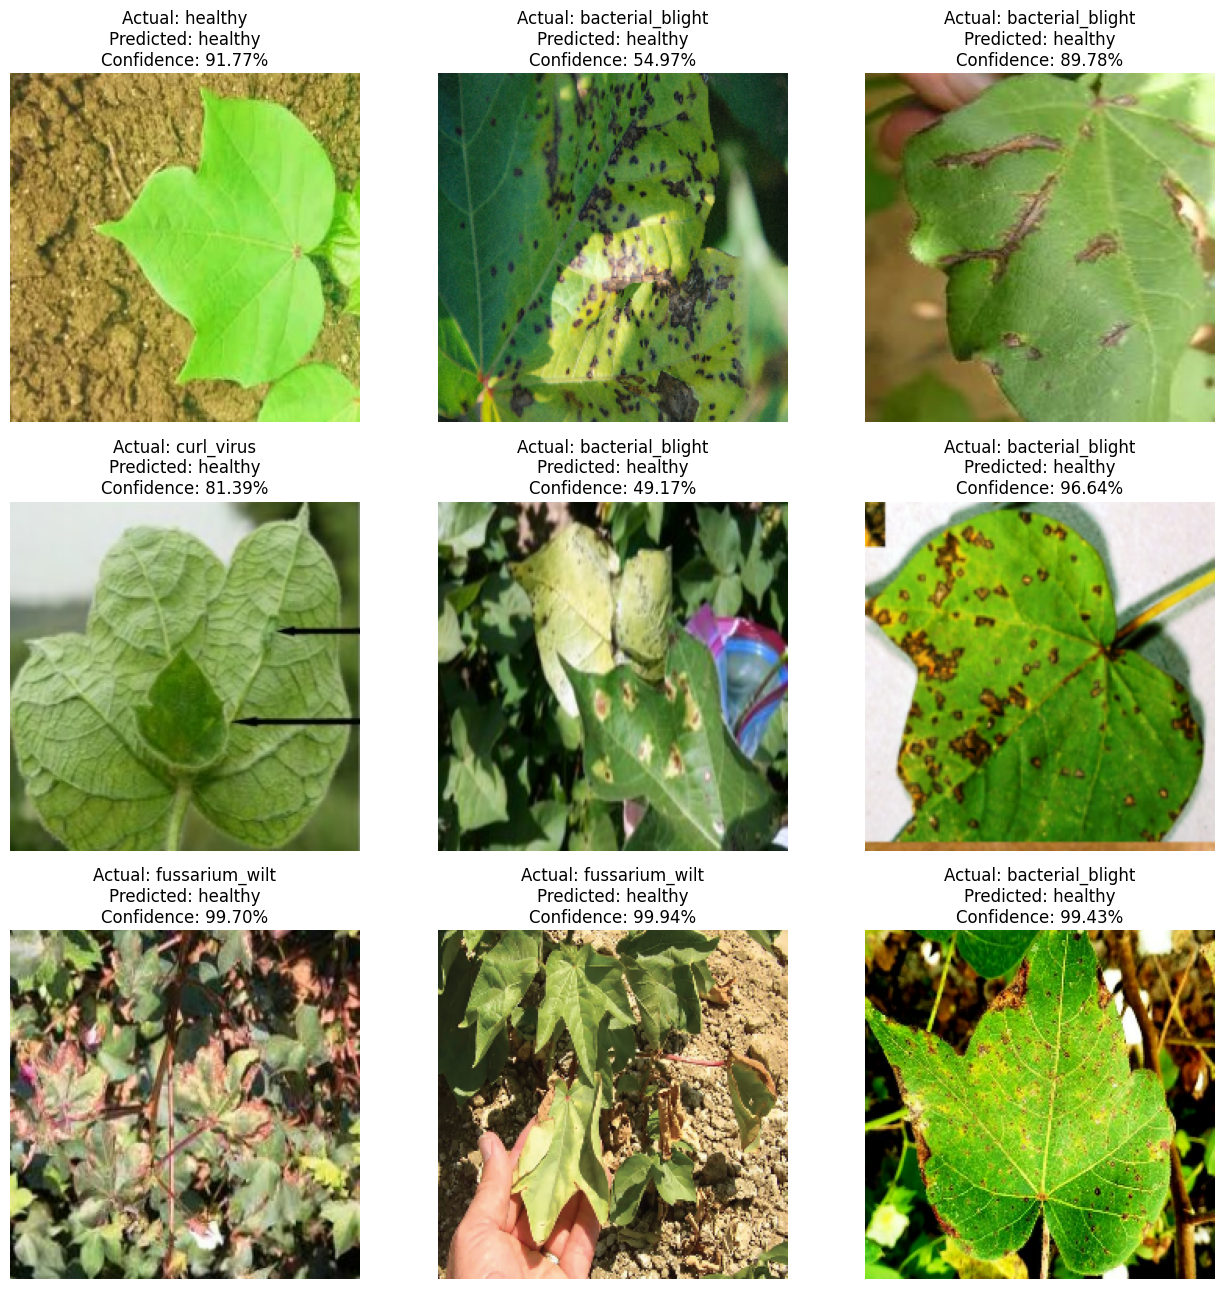

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 13))

# Taking one batch from the test dataset
for images, labels in test_ds.take(1):
    # Iterating through the first 9 images in the batch
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)  # Create a 3x3 grid of subplots
        plt.imshow(images[i].numpy().astype("uint8"))  # Display the image

        # Predict the class and confidence
        predicted_class, confidence = predict(model, images[i].numpy())

        # Get the actual class name from labels
        actual_class = class_name[labels[i]]

        # Set the title of each subplot
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
        plt.axis("off")  # Turn off the axis

plt.tight_layout()  # Adjust layout for better display
plt.show()


In [62]:
model_version = 1
model.save(f"model_{model_version}.keras")  # Add .keras extension

/content/drive/MyDrive/cotton_data/training/bacterial_blight/2015-angular-leaf-spot-colquitt-county-2.jpg: 123
File not found. Please check the path and try again.
